# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# Data

In [2]:
tracks = pd.read_csv('fma-rock-vs-hiphop.csv')
metrics = pd.read_json('echonest-metrics.json')

In [3]:
print(tracks.shape)
tracks.head()

(17734, 21)


,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
print(metrics.shape)
metrics.head()

(13129, 9)


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [5]:
data = metrics.merge(tracks[['track_id', 'genre_top']] , on= "track_id")
print(data.shape)
data.head()

(4802, 10)


,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


##### the data has no missing values

# Pairwise relationships between continuous variables

In [7]:
#correlation between each pair of the features
corr = data.corr()
corr.style.background_gradient()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
acousticness,-0.372282,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221
valence,0.010070,-0.013841,0.473165,0.038603,-0.219967,-0.045093,0.149894,0.052221,1.000000


In [8]:
#identify features and target
x = data.iloc[: , 1:9]
y = data.loc[: , "genre_top"]


### splitting the dataset 

In [9]:
x_train,x_test,y_train,y_test = train_test_split( x , y , test_size=0.2 , random_state=0 )

# Normalizing the feature data

In [10]:
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(x_train)
scaled_test_data = scaler.transform(x_test)

# PCA on scaled data

In [11]:
pca = PCA()
pca.fit(scaled_train_data)
explained_var = pca.explained_variance_ratio_

Text(0.5, 1.0, '% Explained Variance')

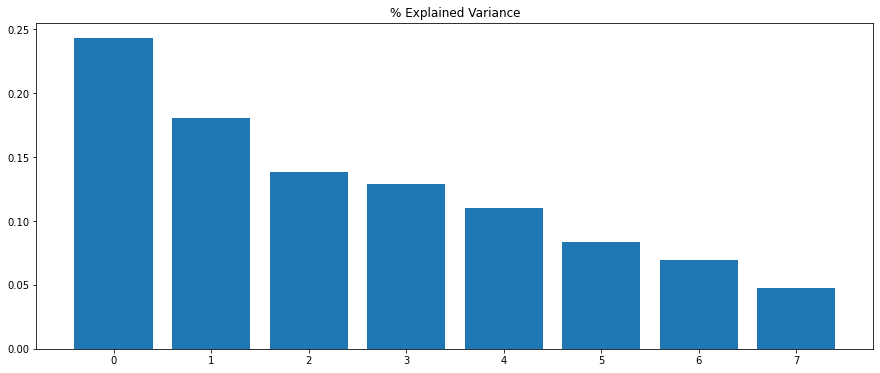

In [12]:
# plot the explained variance
fig = plt.figure(figsize=(15,6))
plt.bar(range(pca.n_components_),explained_var)
plt.title("% Explained Variance")

Text(0.5, 1.0, '% cumulative Variance')

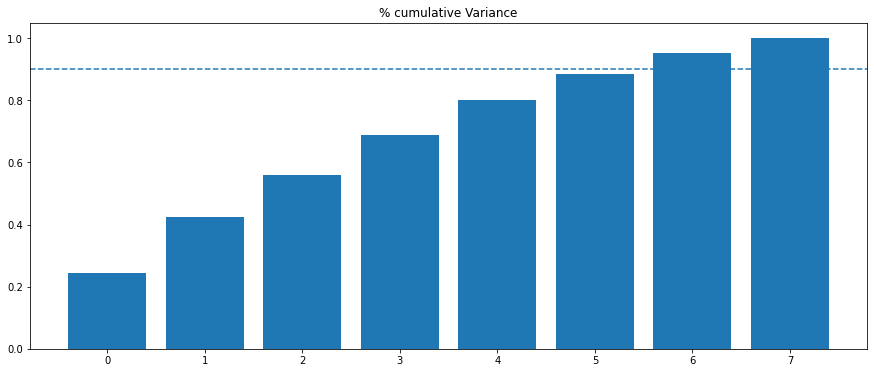

In [13]:
# cumulative variance
cum_var = np.cumsum(explained_var)
fig = plt.figure(figsize=(15,6))
plt.bar(range(pca.n_components_),cum_var)
plt.axhline(y = 0.9 , linestyle = "--")
plt.title("% cumulative Variance")

In [14]:
# we can explain 90% of the data with 7 components
pca = PCA(n_components=7 , random_state=0)
train_pca = pca.fit_transform(scaled_train_data)
test_pca = pca.transform(scaled_test_data)

# Train decision tree model

In [15]:
d_tree = DecisionTreeClassifier()
d_tree.fit(train_pca,y_train)
predictions = d_tree.predict(test_pca)
ac = accuracy_score(y_test,predictions)
print(ac)

0.8616024973985432


# comparison to logistic regression

In [16]:
log_model = LogisticRegression()
log_model.fit(train_pca,y_train)
log_predictions = log_model.predict(test_pca)

In [17]:
# now i will compare which model has higher accuracy score

print("decision tree model score = " , accuracy_score(y_test,predictions))
print("logistic regression model score = ", accuracy_score(y_test,log_predictions))

decision tree model score =  0.8616024973985432
logistic regression model score =  0.8782518210197711


In [18]:
print("decision tree:\n" , pd.DataFrame(confusion_matrix(y_test,predictions)))
print("logistic regression:\n ", pd.DataFrame(confusion_matrix(y_test,log_predictions)))

decision tree:
      0    1
0  118   65
1   68  710
logistic regression:
       0    1
0  104   79
1   38  740


#### logistic regression has higher accuracy score!

# Balancing the data

In [19]:
hip_hop = data[data['genre_top'] == "Hip-Hop"]
rock = data[data['genre_top'] == 'Rock']

print('Hip-Hop: ' , hip_hop.shape)
print('Rock: ', rock.shape)


Hip-Hop:  (910, 10)
Rock:  (3892, 10)


In [20]:
# balancing the data with under-sampling
rock = rock.sample(hip_hop.shape[0] , random_state=0)
rock.shape

(910, 10)

In [21]:
# merging the data
data_2 = pd.concat([hip_hop,rock])
data_2.shape

(1820, 10)

In [22]:
data_2

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
118,583,0.748986,0.765886,0.513173,0.957209,0.614844,0.886914,180.025,0.401672,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...
2300,19658,0.709762,0.162041,0.742216,0.931236,0.632463,0.037541,151.344,0.230853,Rock
27,303,0.922907,0.440868,0.243452,0.859714,0.114738,0.337816,129.598,0.577069,Rock
4753,121260,0.169377,0.347725,0.354402,0.885886,0.102999,0.049030,146.704,0.076857,Rock
705,3764,0.325395,0.281429,0.350532,0.962310,0.184741,0.046942,134.303,0.039635,Rock


In [23]:
x_2 = data_2.iloc[: , 1:9]
y_2 = data_2.loc[: , "genre_top"]

In [24]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x_2,y_2,test_size=0.2,random_state=0)

In [25]:
scaled_train2 = scaler.fit_transform(x2_train)
scaled_test2 = scaler.transform(x2_test)

In [26]:
train2_pca = pca.fit_transform(scaled_train2)
test2_pca = pca.transform(scaled_test2)

# checking if balanced data work better

In [27]:
d_tree2 = DecisionTreeClassifier()
d_tree2.fit(x2_train,y2_train)
predictions2 = d_tree2.predict(x2_test)
print("decision tree:\n")
print("accuracy = ", accuracy_score(y2_test,predictions2),'\n')
print(pd.DataFrame(confusion_matrix(y2_test,predictions2)))


decision tree:

accuracy =  0.8434065934065934 

     0    1
0  156   26
1   31  151


In [28]:
log_model2 = LogisticRegression()
log_model2.fit(x2_train,y2_train)
log_predictions2 = log_model2.predict(x2_test)
print("logistic regression:\n")
print("accuracy = ", accuracy_score(y2_test,log_predictions2),'\n')
print(pd.DataFrame(confusion_matrix(y2_test,log_predictions2)))

logistic regression:

accuracy =  0.8214285714285714 

     0    1
0  150   32
1   33  149


c:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### balancing the data caused lower accuracy scores!!

# Cross Validation

In [29]:
tree_pipeline = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=7)), 
                      ("tree", DecisionTreeClassifier())])
logreg_pipe = Pipeline([("scaler", StandardScaler()), ("pca", PCA(n_components=7)), 
                        ("logreg", LogisticRegression())])

kf = KFold(10)

tree_score = cross_val_score(tree_pipeline, x, y, cv= kf)
logit_score = cross_val_score(logreg_pipe, x, y, cv= kf)

print("Decision Tree:", tree_score.mean())
print("Logistic Regression:", logit_score.mean())


Decision Tree: 0.8629573804573806
Logistic Regression: 0.8787733887733887
